# Análise dos modelos com o Cenário 2

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
from sklearn.model_selection import GridSearchCV

## Cenário 2

In [2]:
data2_200 = pd.read_csv('Cenario2_200000.csv')
data2_200['fraude'] = data2_200['fraude'].astype('category')
data2_200.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km,fraude
0,4127.28,42.0,640.0,1592.0,1576.90,334.32,6,55.72,0.21,30,764.16,11,69.47,0.48,0.28,4.0,7.0,145.19,0.055126,0
1,3058.12,50.0,720.0,9616.0,4540.60,2307.84,3,769.28,0.24,20,2500.16,15,166.68,0.26,0.61,5.0,10.0,200.01,0.095668,0
2,18540.01,53.0,100.0,10630.0,8507.03,2444.90,4,611.22,0.23,40,4358.30,11,396.21,0.41,0.76,0.0,11.0,0.00,0.322908,0
3,0.00,43.0,460.0,5138.0,2046.03,616.56,22,28.03,0.12,30,2671.76,11,242.89,0.52,0.60,1.0,10.0,480.92,0.000000,0
4,3117.92,45.0,290.0,1087.0,1142.75,206.53,10,20.65,0.19,30,739.16,13,56.86,0.68,0.47,2.0,11.0,635.68,0.653934,0


In [3]:
data2_100 = pd.read_csv('Cenario2_100000.csv')
data2_100['fraude'] = data2_100['fraude'].astype('category')
data2_100.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km,fraude
0,4419.69,41.0,120.0,436.0,1181.76,69.76,4,17.44,0.16,70,383.68,10,38.37,0.88,0.28,4.0,6.0,122.78,0.864912,0
1,3047.80,45.0,510.0,1553.0,1313.02,590.14,11,53.65,0.38,10,279.54,13,21.50,0.18,0.07,6.0,7.0,120.20,0.047700,0
2,4220.05,45.0,180.0,454.0,1143.04,49.94,1,49.94,0.11,40,195.22,9,21.69,0.43,0.74,3.0,6.0,144.46,0.336098,0
3,3554.74,34.0,400.0,10520.0,5016.42,946.80,11,86.07,0.09,50,5470.40,14,390.74,0.52,0.26,1.0,13.0,1312.90,0.205688,0
4,12897.93,37.0,970.0,1891.0,3713.75,680.76,23,29.60,0.36,30,340.38,10,34.04,0.18,0.67,1.0,9.0,190.61,0.603224,0


In [4]:
data2_50 = pd.read_csv('Cenario2_50000.csv')
data2_50['fraude'] = data2_50['fraude'].astype('category')
data2_50.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km,fraude
0,1766.91,38.0,420.0,4326.0,2127.62,1730.40,7,247.20,0.40,20,1341.06,7,191.58,0.31,0.45,4.0,3.0,120.70,0.237181,0
1,0.00,43.0,310.0,6093.0,2428.03,2071.62,9,230.18,0.34,20,3168.36,9,352.04,0.52,0.18,2.0,7.0,380.20,0.000000,0
2,4299.73,51.0,860.0,658.0,1242.97,296.10,6,49.35,0.45,30,230.30,13,17.72,0.35,0.49,3.0,10.0,94.42,3.994846,0
3,8092.71,52.0,530.0,2159.0,2715.75,388.62,8,48.58,0.18,80,1252.22,11,113.84,0.58,0.20,1.0,10.0,601.07,0.245703,0
4,27904.92,39.0,420.0,4126.0,8059.36,1526.62,20,76.33,0.37,20,2351.82,9,261.31,0.57,0.15,1.0,8.0,376.29,1.610304,0


### n = 200.000

###### Dividindo a base em treino e teste

In [5]:
np.random.seed(71)
X2_train, X2_test, y2_train, y2_test = train_test_split(data2_200.drop('fraude',axis=1),data2_200['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X2_train.shape,X2_test.shape

((140000, 19), (60000, 19))

#### Árvore de Decisão

In [6]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X2_train,y2_train)

In [7]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X2_train,y2_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.6min finished


DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3,
                       random_state=0)

In [8]:
# Melhor modelo encontrado
clf2 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf2 = clf2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred = clf2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


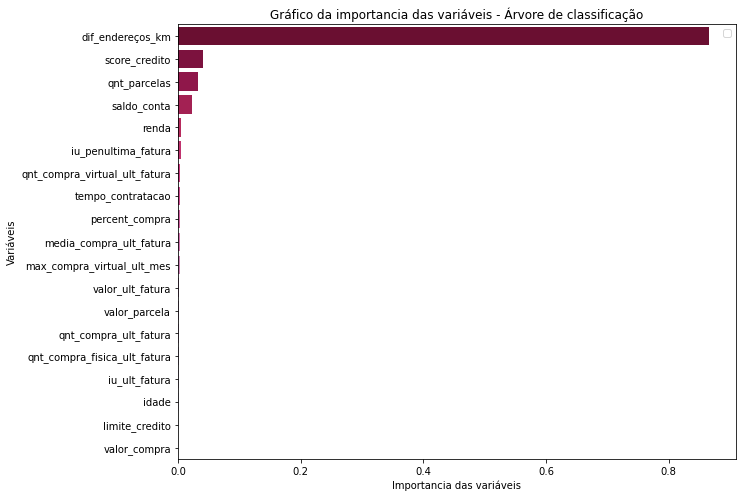

In [9]:
feature_imp = pd.Series(clf2.feature_importances_,index=data2_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [10]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X2_train,y2_train) 

RandomForestClassifier(random_state=0)

In [11]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X2_train,y2_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 73.1min finished


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=0)

In [12]:
# Melhor modelo encontrado
rfc2 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc2 = rfc2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred_rf = rfc2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


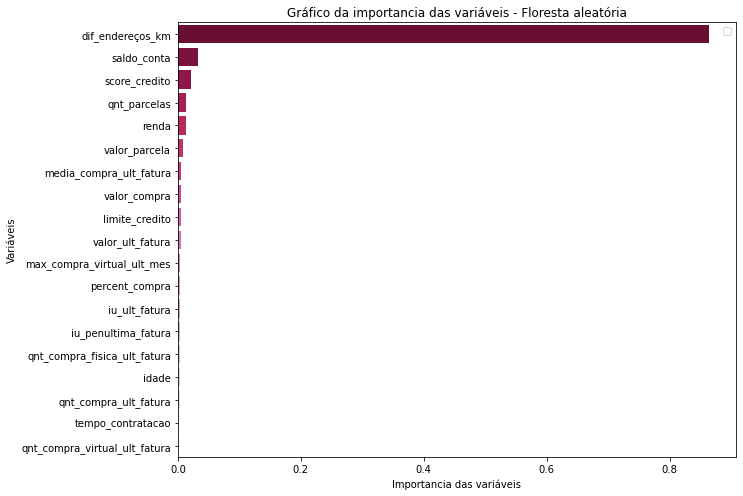

In [13]:
feature_imp = pd.Series(rfc2.feature_importances_,index=data2_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta aleatória")
plt.legend()
plt.show()

#### Comparação das duas tecnicas 

In [14]:
# Função que calcula as métricas
def metricas(sS, fS, sF, fF):
    N = sS + fS + sF + fF
    s = sF + sS
    S = fS + sS
    f = fS + fF
    F = sF + fF
    CAT = (sS + fF)/ N
    CAS = sS/S
    CAF = fF/F
    VPP = sS/s
    VPN = fS/f
    PVL = S/N
    MCC = (sS*fF - sF*fS)/np.sqrt(s*S*f*F)
    print("CAT = ",round(CAT,3))
    print("CAS = ",round(CAS,3))
    print("CAF = ",round(CAF,3))
    print("VPP = ",round(VPP,3))
    print("VPN = ",round(VPN,3))
    print("PVL = ",round(PVL,3))
    print("MCC = ",round(MCC,3))

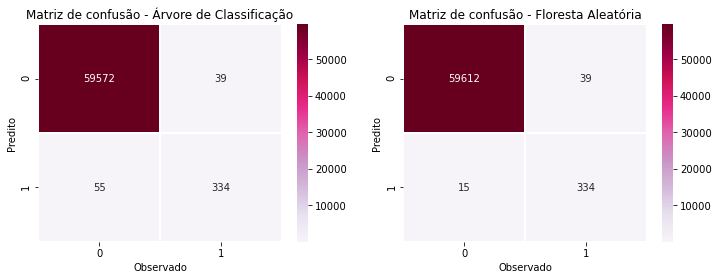

In [15]:
# Matriz de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix2 = pd.crosstab(y2_pred, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix2, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix2_rf = pd.crosstab(y2_pred_rf, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix2_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")
plt.show ()

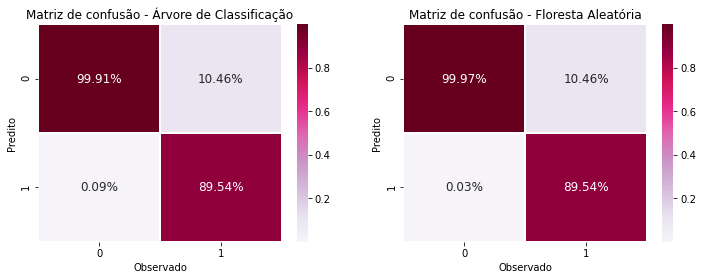

In [16]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix2 = pd.crosstab(y2_pred, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix2/np.sum(confusion_matrix2), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix2_rf = pd.crosstab(y2_pred_rf, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix2_rf/np.sum(confusion_matrix2_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [17]:
metricas(confusion_matrix2.iloc[1,1], confusion_matrix2.iloc[0,1], confusion_matrix2.iloc[1,0], confusion_matrix2.iloc[0,0])

CAT =  0.998
CAS =  0.895
CAF =  0.999
VPP =  0.859
VPN =  0.001
PVL =  0.006
MCC =  0.876


In [18]:
metricas(confusion_matrix2_rf.iloc[1,1], confusion_matrix2_rf.iloc[0,1], confusion_matrix2_rf.iloc[1,0], confusion_matrix2_rf.iloc[0,0])

CAT =  0.999
CAS =  0.895
CAF =  1.0
VPP =  0.957
VPN =  0.001
PVL =  0.006
MCC =  0.925


### n = 100.000

###### Dividindo a base em treino e teste

In [19]:
np.random.seed(71)
X1_train, X1_test, y1_train, y1_test = train_test_split(data2_100.drop('fraude',axis=1),data2_100['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X1_train.shape,X1_test.shape

((70000, 19), (30000, 19))

#### Árvore de Decisão

In [20]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X1_train,y1_train)

In [21]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X1_train,y1_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.8min finished


DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

In [22]:
# Melhor modelo encontrado
clf1 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf1 = clf1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred = clf1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


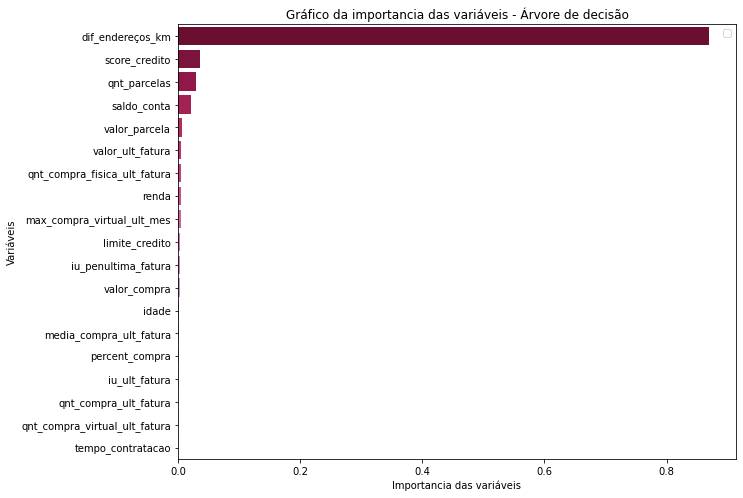

In [23]:
feature_imp = pd.Series(clf1.feature_importances_,index=data2_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de decisão")
plt.legend()
plt.show()

#### Floresta Aleatória

In [24]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X1_train,y1_train) 

RandomForestClassifier(random_state=0)

In [25]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X1_train,y1_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 35.8min finished


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=0)

In [26]:
# Melhor modelo encontrado
rfc1 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc1 = rfc1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred_rf = rfc1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


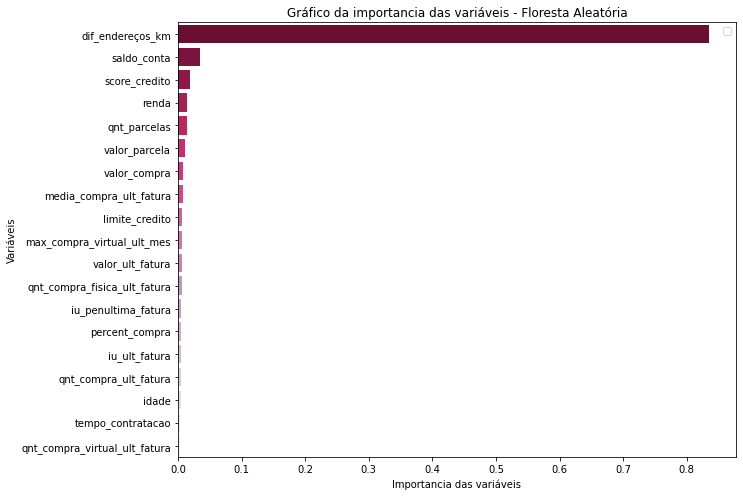

In [27]:
feature_imp = pd.Series(rfc1.feature_importances_,index=data2_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

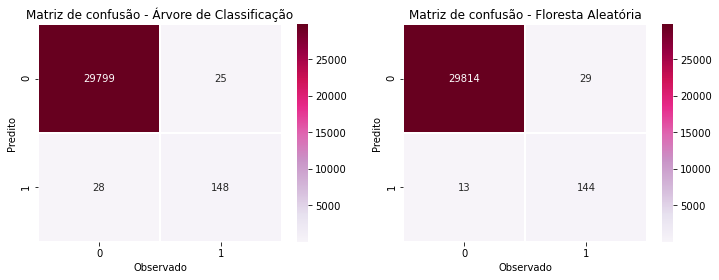

In [28]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix1 = pd.crosstab(y1_pred, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix1, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix1_rf = pd.crosstab(y1_pred_rf, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix1_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

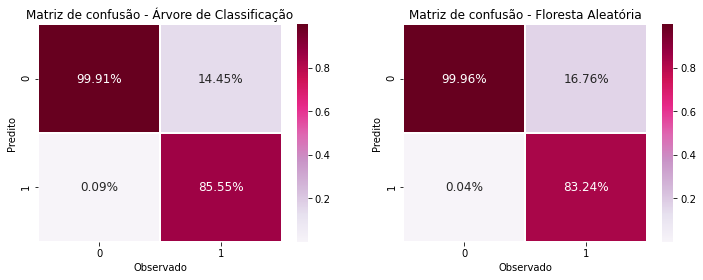

In [29]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix1 = pd.crosstab(y1_pred, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1),fmt='.2%', linewidths=.5, annot = True, cmap='PuRd', annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix1_rf = pd.crosstab(y1_pred_rf, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix1_rf/np.sum(confusion_matrix1_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [30]:
metricas(confusion_matrix1.iloc[1,1], confusion_matrix1.iloc[0,1], confusion_matrix1.iloc[1,0], confusion_matrix1.iloc[0,0])

CAT =  0.998
CAS =  0.855
CAF =  0.999
VPP =  0.841
VPN =  0.001
PVL =  0.006
MCC =  0.847


In [31]:
metricas(confusion_matrix1_rf.iloc[1,1], confusion_matrix1_rf.iloc[0,1], confusion_matrix1_rf.iloc[1,0], confusion_matrix1_rf.iloc[0,0])

CAT =  0.999
CAS =  0.832
CAF =  1.0
VPP =  0.917
VPN =  0.001
PVL =  0.006
MCC =  0.873


### n = 50.000

###### Dividindo a base em treino e teste

In [32]:
np.random.seed(71)
X5_train, X5_test, y5_train, y5_test = train_test_split(data2_50.drop('fraude',axis=1),data2_50['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X5_train.shape,X5_test.shape

((35000, 19), (15000, 19))

#### Árvore de Decisão

In [33]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X5_train,y5_train)

In [34]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X5_train,y5_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   44.8s finished


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=0)

In [35]:
# Melhor modelo encontrado
clf5 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf5 = clf5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred = clf5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


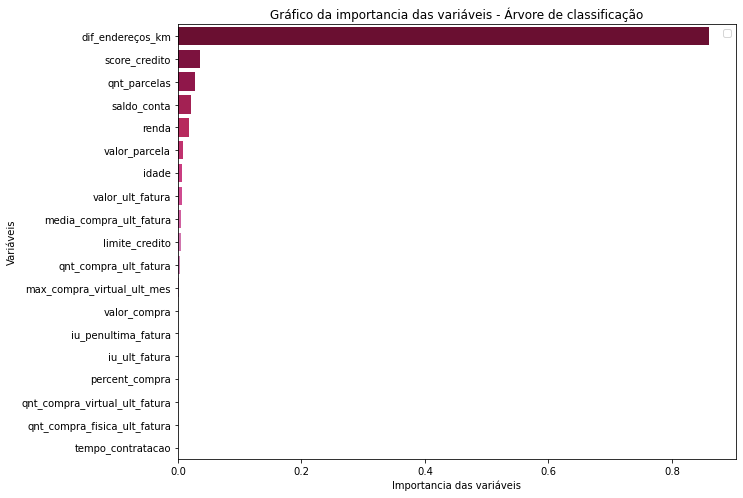

In [36]:
feature_imp = pd.Series(clf5.feature_importances_,index=data2_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [37]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X5_train,y5_train) 

RandomForestClassifier(random_state=0)

In [38]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X5_train,y5_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.7min finished


RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=0)

In [39]:
# Melhor modelo encontrado
rfc5 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc5 = rfc5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred_rf = rfc5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


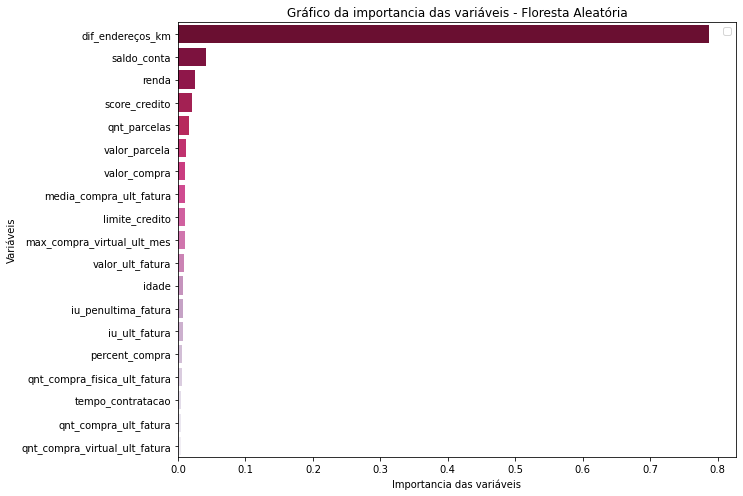

In [40]:
feature_imp = pd.Series(rfc5.feature_importances_,index=data2_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

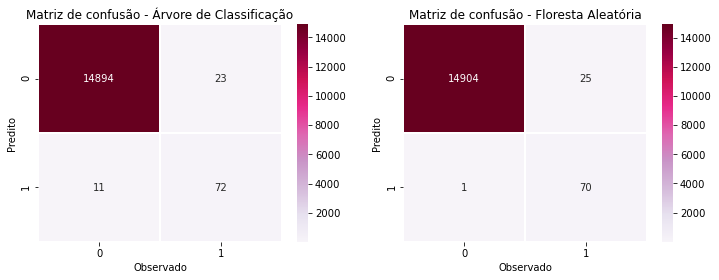

In [41]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix5 = pd.crosstab(y5_pred, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix5, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix5_rf = pd.crosstab(y5_pred_rf, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix5_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

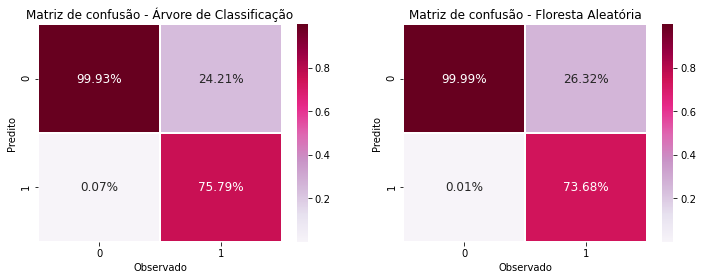

In [42]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix5 = pd.crosstab(y5_pred, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix5/np.sum(confusion_matrix5),fmt='.2%', linewidths=.5, annot = True, cmap='PuRd', annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix5_rf = pd.crosstab(y5_pred_rf, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix5_rf/np.sum(confusion_matrix5_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [43]:
metricas(confusion_matrix5.iloc[1,1], confusion_matrix5.iloc[0,1], confusion_matrix5.iloc[1,0], confusion_matrix5.iloc[0,0])

CAT =  0.998
CAS =  0.758
CAF =  0.999
VPP =  0.867
VPN =  0.002
PVL =  0.006
MCC =  0.81


In [44]:
metricas(confusion_matrix5_rf.iloc[1,1], confusion_matrix5_rf.iloc[0,1], confusion_matrix5_rf.iloc[1,0], confusion_matrix5_rf.iloc[0,0])

CAT =  0.998
CAS =  0.737
CAF =  1.0
VPP =  0.986
VPN =  0.002
PVL =  0.006
MCC =  0.852
